#  Inroduction to Seaborn

Seaborn is a popular Python data visualization library that is built on top of Matplotlib.

It provides a high-level interface for creating informative and attractive statistical graphics.

It’s particularly well-suited for visualizing complex datasets and is commonly used for tasks such as data exploration, data analysis, and data presentation.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#import dataset
data = pd.read_excel("/content/Sample Superstore.xlsx")
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


1. Scatter plot

most of the sns plots use this convention

* sns.plotname(x='col_name') or y, depending on the axis #for one variable
* sns.plotname(x='col1_name', y='col2_name') for 2 variables
* sns.plotname(x='col1_name', y='col2_name', hue='cat col3 name') for 3 variables.

Note: x, and y are axis

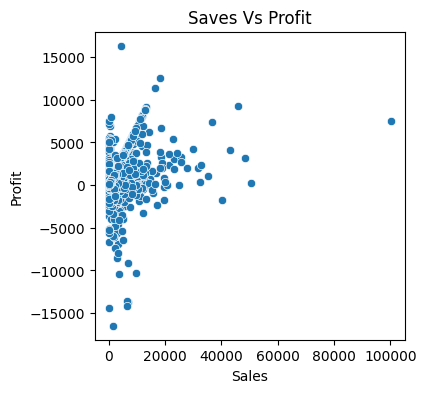

In [3]:
#scatter plot # visualizing 2 numerical variable
plt.figure(figsize=(4,4))
sns.scatterplot(x=data['Sales'], y=data['Profit'])
plt.title("Saves Vs Profit");


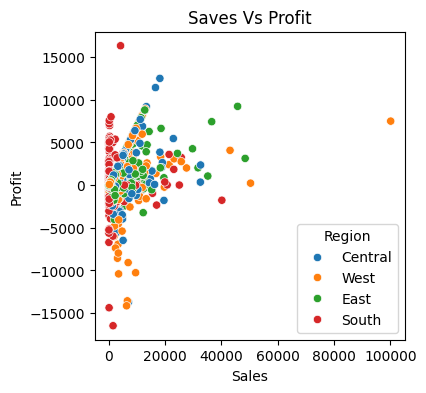

In [4]:
#Visualizing 2 numerical variables and 1 categorical variable
#sns.scatterplot(x=data['num_col'], y=data['num_col'], hue=data['cat_col'])
plt.figure(figsize=(4,4))
sns.scatterplot(x=data['Sales'], y=data['Profit'], hue=data['Region'])
plt.title("Saves Vs Profit");


2. Count Plot

used to visualize categorical variables

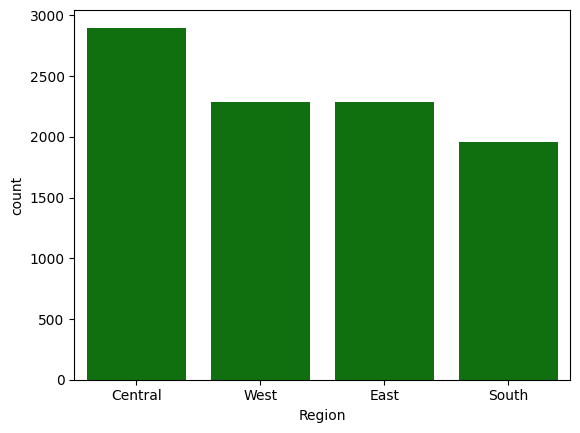

In [5]:
#count plot of Region variable
sns.countplot(x=data['Region'], color='g');

<Axes: xlabel='Region', ylabel='count'>

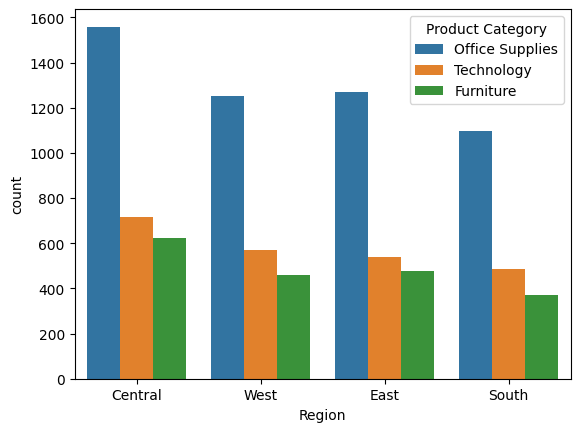

In [6]:
#Add hue to get the count of 2 categories.
sns.countplot(x='Region', hue='Product Category', data=data)

3. Box Plot

used to detect outliers

In [7]:
data.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

<Axes: ylabel='Shipping Cost'>

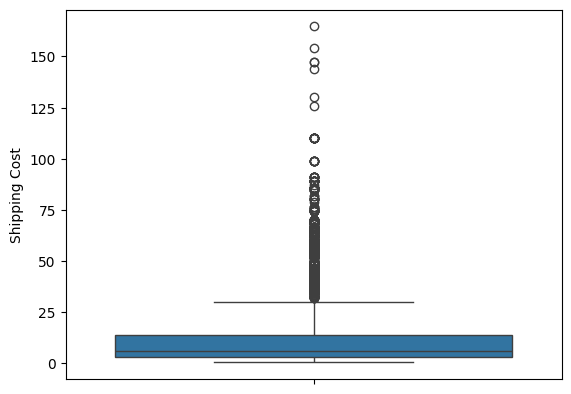

In [8]:
#ploting box plot
sns.boxplot(y=data['Shipping Cost'])

<Axes: xlabel='Ship Mode', ylabel='Shipping Cost'>

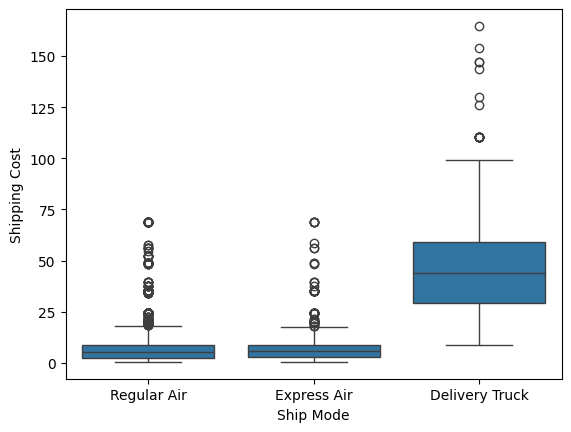

In [9]:
# ploting categorical vs numerical variablse
sns.boxplot(x='Ship Mode', y='Shipping Cost', data=data)

<Axes: xlabel='Shipping Cost', ylabel='Ship Mode'>

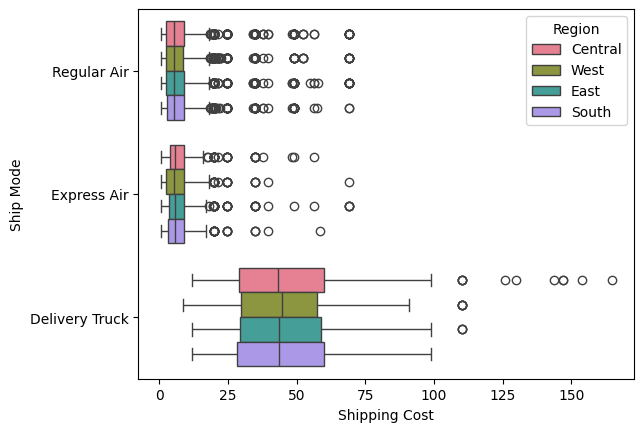

In [10]:
#Visualizing the 3 variables
sns.boxplot(y='Ship Mode', x='Shipping Cost', hue='Region', data=data, orient='horizontal', palette='husl')

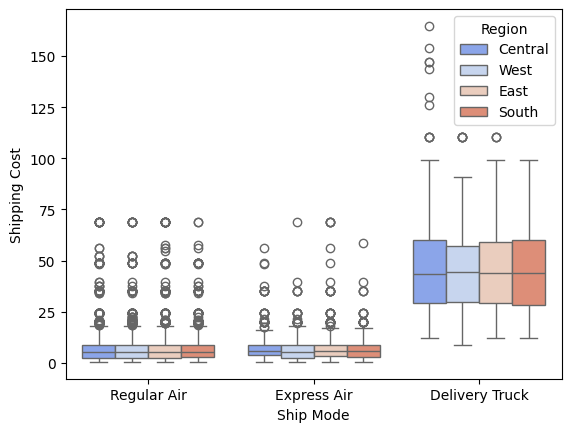

In [11]:
#box plots for  3 variables
sns.boxplot(x='Ship Mode', y='Shipping Cost', data=data, hue='Region', palette='coolwarm');

4. Bar Plot
used on numerical and categorical variables

<Axes: xlabel='Ship Mode', ylabel='Sales'>

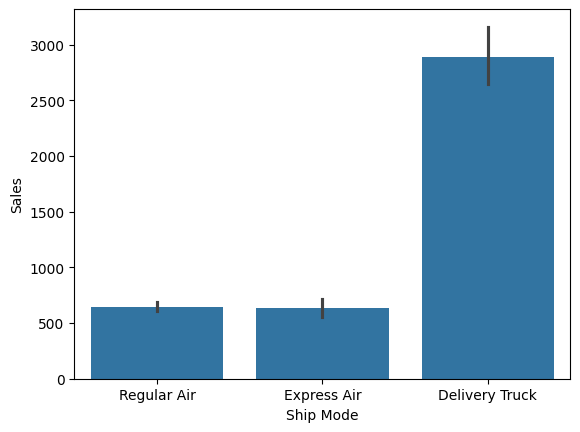

In [12]:
#Ploting a bar plot
sns.barplot(x='Ship Mode', y='Sales', data=data)

<Axes: xlabel='Ship Mode', ylabel='Sales'>

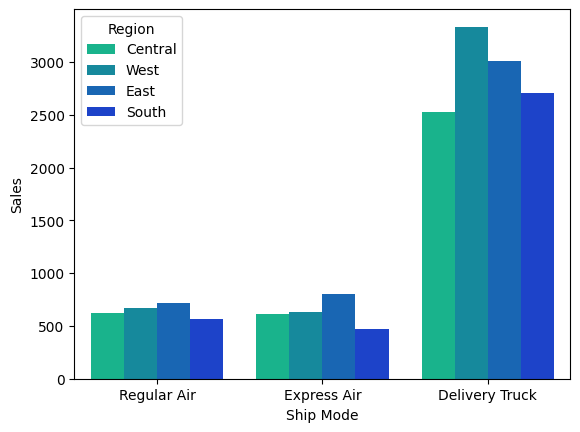

In [13]:
#Visualizing 3 varaibles
sns.barplot(x='Ship Mode', y='Sales', data=data, hue='Region', palette='winter_r', errorbar= None)

<Axes: xlabel='Ship Mode', ylabel='Sales'>

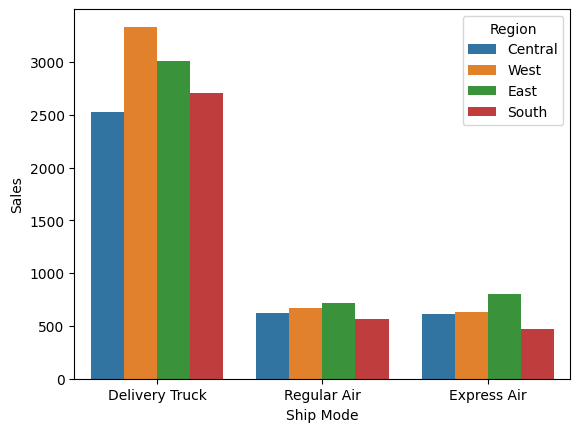

In [14]:
#Reordering the sequence
sns.barplot(x='Ship Mode', y='Sales', data=data, order=['Delivery Truck', 'Regular Air', 'Express Air'], hue='Region', errorbar= None)

5. HistPlot/Distplot
used on continous **variable**

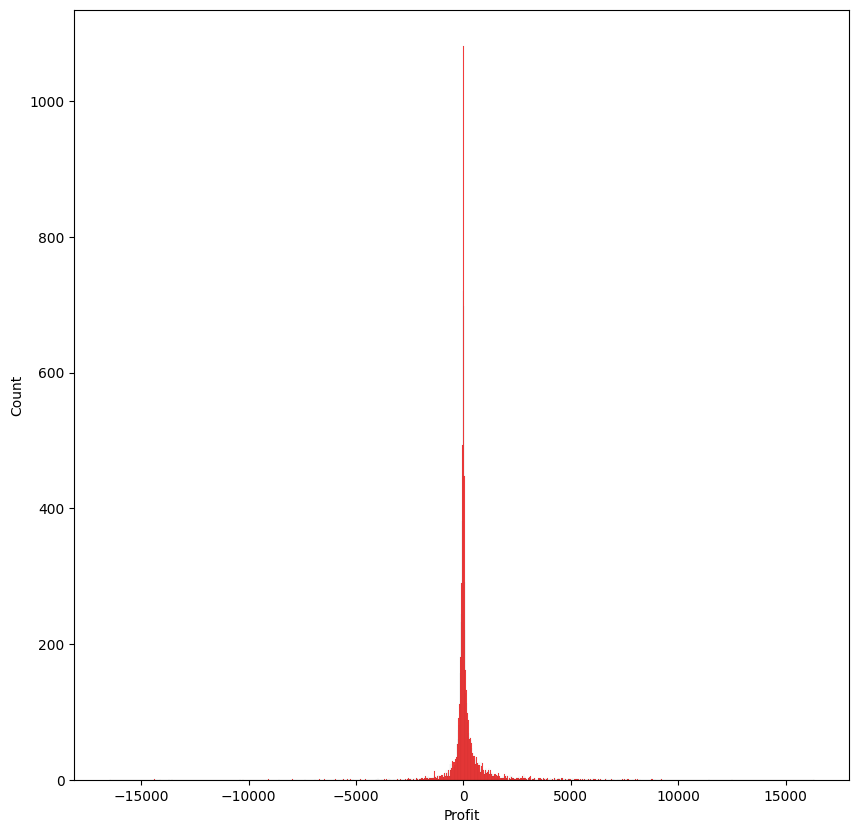

In [15]:
#Ploting histplot
plt.figure(figsize=(10,10))
sns.histplot(data['Profit'], color='r');

<ipython-input-16-e8d137c9c12d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'], hist=False)


<Axes: xlabel='Profit', ylabel='Density'>

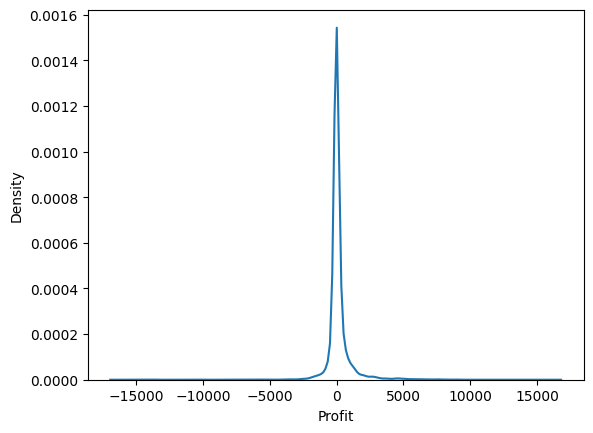

In [16]:
sns.distplot(data['Profit'], hist=False)

6. Heatmap

Used to visualize correlation matrix

In [17]:
#create a new subset dataframe of numerical variables
data2 = data.select_dtypes('int')
data2.head()

,Row ID,Customer ID,Postal Code,Quantity ordered new,Order ID
0,18606,2,60101,2,88525
1,20847,3,98221,4,88522
2,23086,3,98221,7,88523
3,23087,3,98221,7,88523
4,23088,3,98221,8,88523


<Axes: >

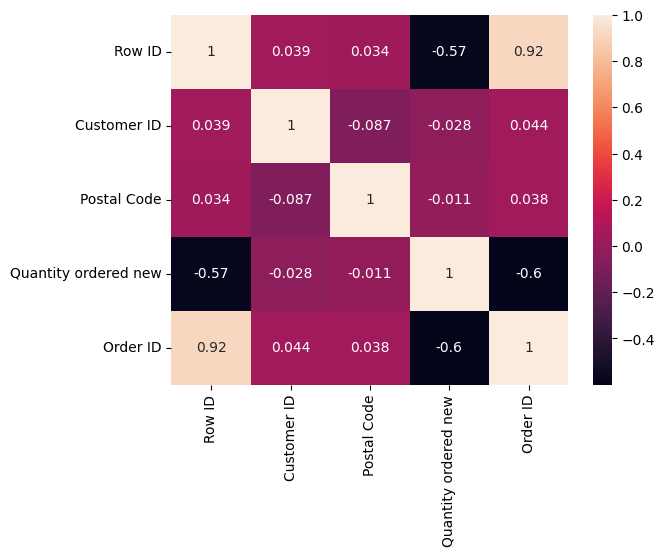

In [18]:
#Get correlation matrix
corr =data2 .corr()


#create heatmap
sns.heatmap(corr, annot=True)


<Axes: >

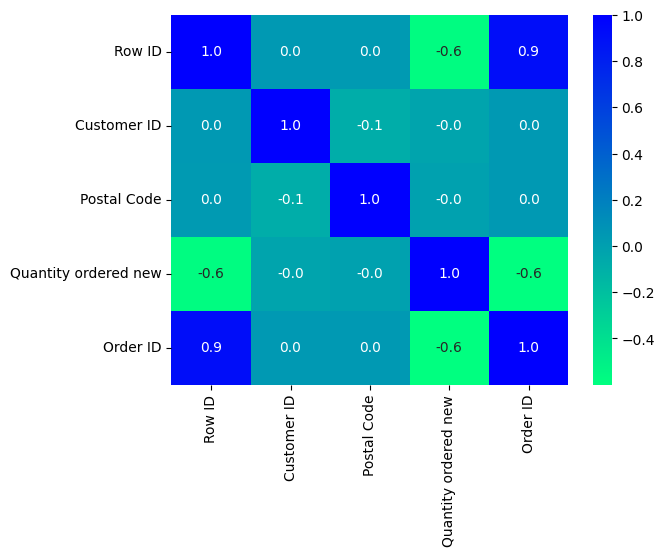

In [19]:
#specifying the decimal points to display
corr =data2 .corr()
sns.heatmap(corr, annot=True, cmap='winter_r', fmt='.1f')


7. line graph

<Axes: xlabel='Region', ylabel='Profit'>

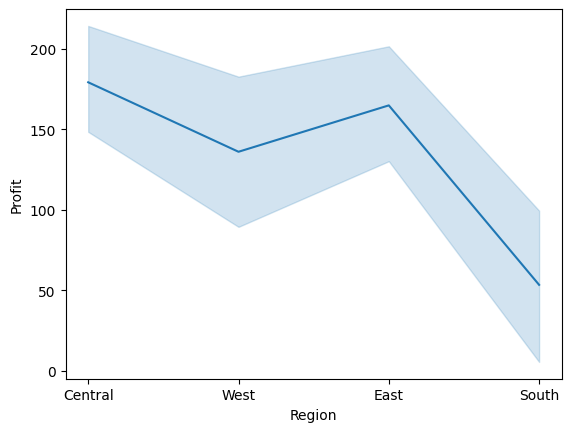

In [20]:
#create a line graph
sns.lineplot(x="Region", y="Profit", data=data)
#note: this is just for demonstration, use lineplot on data with period/time


8. Violin plot

<Axes: ylabel='Sales'>

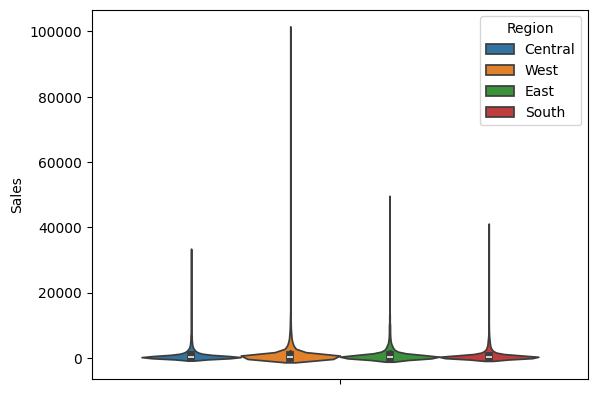

In [23]:
#Violin plot for one variable
sns.violinplot(y='Sales', data=data, hue='Region')

In [ ]:
#violin plot for 2 variables
#sns.violinplot(x="Sales", y='Profit', hue='Region', data=data)# this might take long to run

Extra

9. Pie chart

used on categorical variables

Note: do not use it on more than 4 sub_categories

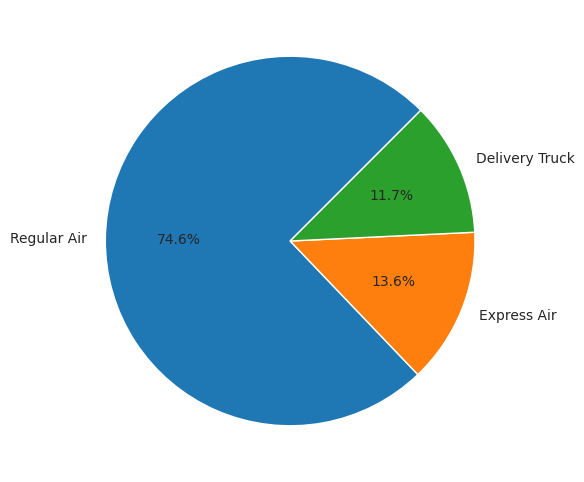

In [ ]:
#Creating a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].unique(), autopct='%1.1f%%', startangle=45);

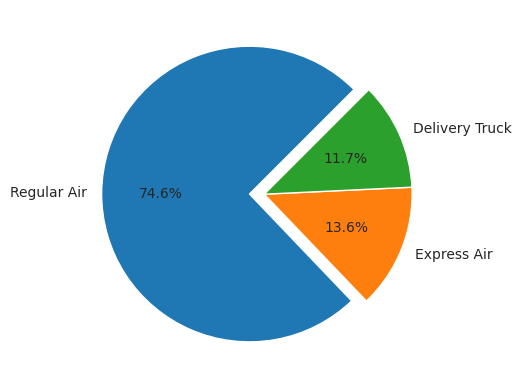

In [ ]:
#using explode argument
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].unique(), autopct='%1.1f%%', startangle=45, explode=[.1,.0,.0]);

Note: Ensure to format the visualization with necessary plt attributes, and seaborn arguments.

End